## Exploring IMD data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy as cp
import warnings
warnings.simplefilter('ignore')

#### Temperature

In [2]:
tmax = xr.open_mfdataset('../data/tmax/netcdf/*.nc')

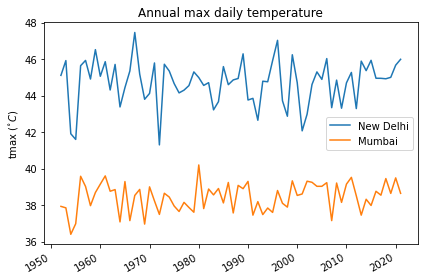

In [16]:
fig, ax = plt.subplots(1,1)

tmax['tmax'].resample(time='1Y').max().sel(lat=28.700, lon=77.100, method='nearest').plot(ax=ax, label='New Delhi')
tmax['tmax'].resample(time='1Y').max().sel(lat=19.076, lon=72.878, method='nearest').plot(ax=ax, label='Mumbai')

plt.title('Annual max daily temperature')
plt.ylabel('tmax ($^{\circ}C$)')
plt.xlabel(None)

plt.legend()
plt.tight_layout()
# plt.savefig('./figures/tmax_ts.png', dpi=300)

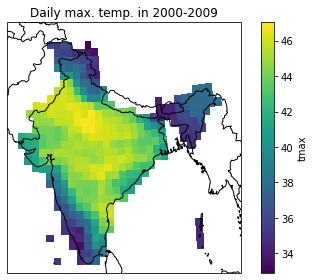

In [5]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection':ccrs.Orthographic(central_longitude=73, central_latitude=21)})

tmax['tmax'].sel(time=pd.date_range('2000-01-01', '2009-12-31')).max('time').plot(ax=ax, transform=ccrs.PlateCarree())

plt.title('Daily max. temp. in 2000-2009')

ax.coastlines()
ax.add_feature(cp.feature.BORDERS)
plt.tight_layout()

# plt.savefig('./figures/tmax_map.png', dpi=300)

#### Rainfall

In [17]:
rain = xr.open_mfdataset('../data/rain/netcdf/*.nc')

In [25]:
tmax

<xarray.Dataset>
Dimensions:  (time: 25568, lat: 31, lon: 31)
Coordinates:
  * time     (time) datetime64[ns] 1951-01-01 1951-01-02 ... 2020-12-31
  * lat      (lat) float64 7.5 8.5 9.5 10.5 11.5 ... 33.5 34.5 35.5 36.5 37.5
  * lon      (lon) float64 67.5 68.5 69.5 70.5 71.5 ... 93.5 94.5 95.5 96.5 97.5
Data variables:
    tmax     (time, lat, lon) float64 dask.array<chunksize=(365, 31, 31), meta=np.ndarray>

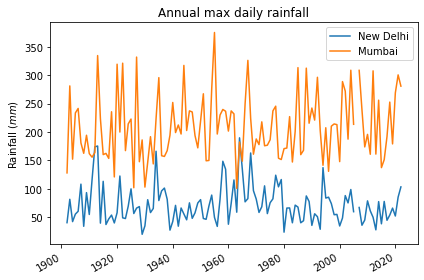

In [7]:
fig, ax = plt.subplots(1,1)

rain['rainfall'].resample(time='1Y').max().sel(lat=28.700, lon=77.100, method='nearest').plot(ax=ax, label='New Delhi')
rain['rainfall'].resample(time='1Y').max().sel(lat=19.076, lon=72.878, method='nearest').plot(ax=ax, label='Mumbai')

plt.title('Annual max daily rainfall')
plt.ylabel('Rainfall ($mm$)')
plt.xlabel(None)

plt.legend()
plt.tight_layout()
# plt.savefig('./figures/rainfall_ts.png', dpi=300)

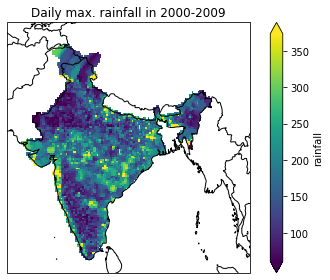

In [8]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection':ccrs.Orthographic(central_longitude=73, central_latitude=21)})

rain['rainfall'].sel(time=pd.date_range('2000-01-01', '2009-12-31')).max('time').plot(ax=ax, transform=ccrs.PlateCarree(), robust=True)

plt.title('Daily max. rainfall in 2000-2009')

ax.coastlines()
ax.add_feature(cp.feature.BORDERS)
plt.tight_layout()

# plt.savefig('./figures/rainfall_map.png', dpi=300)